# DS-SF-23 | Codealong 08 | Introduction to Classification

In [41]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import neighbors, metrics, grid_search, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Review and Activity | Customer Retention Rates

In [42]:
# Training df
# t is number of years
train_df = pd.DataFrame({'t': range(8), 'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]})

In [43]:
train_df

,survival_rate,t
0,1.000,0
1,0.869,1
2,0.743,2
3,0.653,3
4,0.593,4
5,0.551,5
6,0.517,6
7,0.491,7


In [44]:
# Rename them x and y
train_df['y'] = train_df.survival_rate
train_df['x'] = train_df.t

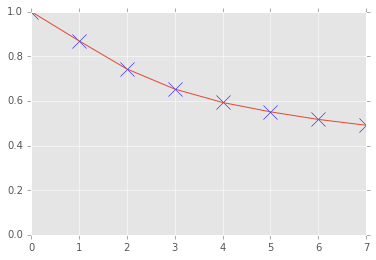

In [45]:
plt.figure()
plt.xlim((0, 7))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(train_df.x, train_df.y)

In [46]:
linear_model = smf.ols(formula = 'y ~ x', data = train_df).fit()

In [47]:
linear_model.summary()
# complaining because we have no data points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Tue, 31 May 2016   Prob (F-statistic):           0.000153
Time:                        20:36:41   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
x             -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

x is negative because the slope decreases

y = 0.9254 - 0.0709x

In [48]:
linear_model.params

Intercept    0.925417
x           -0.070940
dtype: float64

In [49]:
# The equation in python
def linear_y_hat(t):
    return linear_model.params.Intercept + linear_model.params.x * t

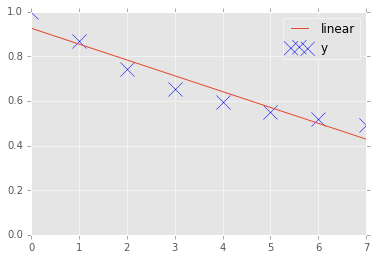

In [50]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.legend()

In [51]:
quadratic_model = smf.ols(formula = 'y ~ x + x ^ 2', data = train_df).fit()

In [52]:
quadratic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     30.03
Date:                Tue, 31 May 2016   Prob (F-statistic):            0.00164
Time:                        20:36:42   Log-Likelihood:                 13.121
No. Observations:                   8   AIC:                            -20.24
Df Residuals:                       5   BIC:                            -20.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9211      0.041     22.274      0.000         0.815     1.027
x             -0.0729      0.012     -6.252      0.002        -0.103    -0.043
x ^ 2          0.0032      0.012      0.275      0.795        -0.027     0.033
==============================================================================
Omnibus:                        1.491   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                0.769
Skew:                           0.342   Prob(JB):                        0.681
Kurtosis:                       1.644   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
def quadratic_y_hat(t):
    return quadratic_model.params[0] \
           + quadratic_model.params[1] * t \
           + quadratic_model.params[2] * (t ** 2)

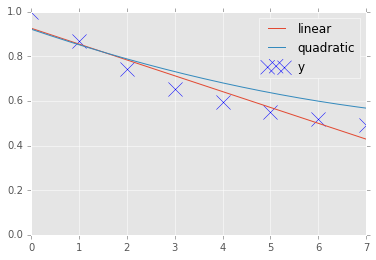

In [54]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.legend()

In [55]:
# Polynomial of degree 7
def polynomial_y_hat(t):
    return 1.\
           - .100597619 * t \
           - .0596777778 * (t ** 2) \
           + .0380569444 * (t ** 3) \
           - .0101944444 * (t ** 4) \
           + .00153611111 * (t ** 5) \
           - .000127777778 * (t ** 6) \
           + .00000456349206 * (t ** 7)

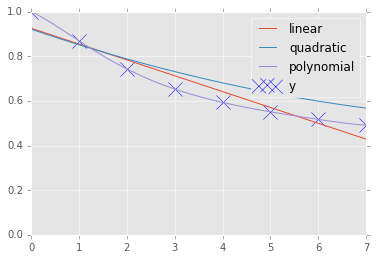

In [56]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.legend()

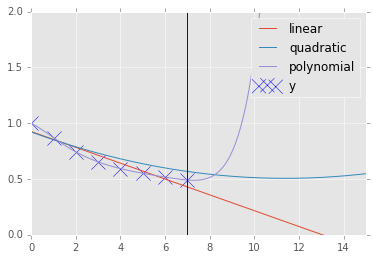

In [57]:
xs = pd.Series(np.linspace(0, 15, 1200))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.axvline(x = 7)
plt.legend()

The polynomial model has been overfit, which is why it gives bad predictions.

The quadratic model doesn't make sense either because it suggests the number of customers will go up after a time.

The linear model suggests that at year 14, we will have negative customers. 

None of these models make sense.

In [58]:
# Real data
test_df = pd.DataFrame({'t': range(8, 13), 'survival_rate': [.468, .445, .427, .409, .394]})

In [59]:
test_df

,survival_rate,t
0,0.468,8
1,0.445,9
2,0.427,10
3,0.409,11
4,0.394,12


In [60]:
test_df['y'] = test_df.survival_rate
test_df['x'] = test_df.t

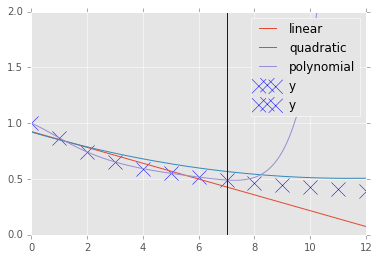

In [61]:
xs = pd.Series(np.linspace(0, 12, 1200))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.axvline(x = 7)
plt.scatter(test_df.x, test_df.y, marker = 'x', s = 200)
plt.legend()

In [62]:
test_df['linear_y_hat'] = test_df.x.apply(linear_y_hat)
test_df['quadratic_y_hat'] = test_df.x.apply(quadratic_y_hat)
test_df['polynomial_y_hat'] = test_df.x.apply(polynomial_y_hat)

In [63]:
# R^2 of the linear
test_df.x.corr(test_df['linear_y_hat']) ** 2

1.0000000000000004

In [64]:
test_df.x.corr(test_df['quadratic_y_hat']) ** 2

0.84594607876189776

In [65]:
test_df.x.corr(test_df['polynomial_y_hat']) ** 2

0.79740040125972134

In [66]:
test_df.columns

Index([u'survival_rate', u't', u'y', u'x', u'linear_y_hat', u'quadratic_y_hat',
       u'polynomial_y_hat'],
      dtype='object')

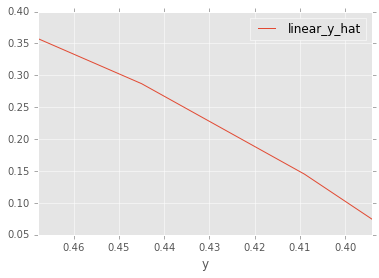

In [67]:
test_df.plot(x = 'y', y = 'linear_y_hat')

Even though the linear model has a high R^2 = 1, it is not a good model. All this tells us is that the ratio of the slope is constant/the same. The R^2 doesn't tell us that the slope is the same.

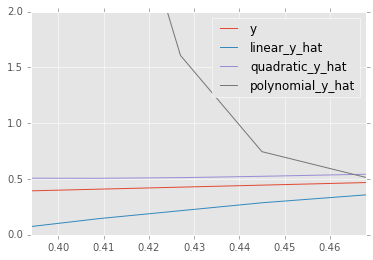

In [69]:
plt.figure()
plt.xlim((test_df.y.min(), test_df.y.max()))
plt.ylim((0, 2))
plt.plot(test_df.y, test_df.y, label = 'y')
plt.plot(test_df.y, test_df.linear_y_hat, label = 'linear_y_hat')
plt.plot(test_df.y, test_df.quadratic_y_hat, label = 'quadratic_y_hat')
plt.plot(test_df.y, test_df.polynomial_y_hat, label = 'polynomial_y_hat')
plt.legend()

## `Iris` dataset

In [70]:
df = pd.read_csv(os.path.join('..', 'datasets', 'iris.csv'))

In [71]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Species is our y variable.

## Part A - Activity | Iris Dataset | Exploratory Data Analysis

In [73]:
color = df.Species.map(pd.Series({'Setosa': 'red', 
                                  'Versicolor': 'green', 
                                  'Virginica': 'blue'}))

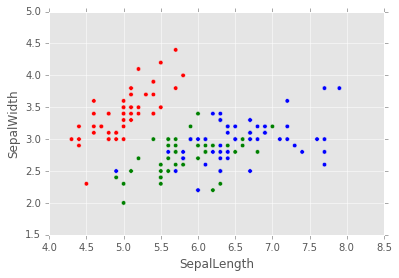

In [77]:
# Plot the data: Sepals
df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color )

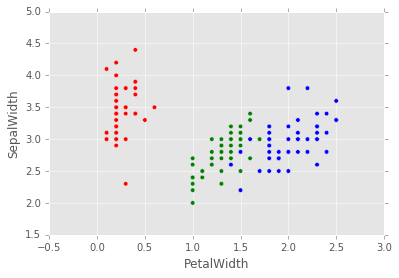

In [78]:
# Widths
df.plot('PetalWidth', 'SepalWidth', kind = 'scatter', c = color )

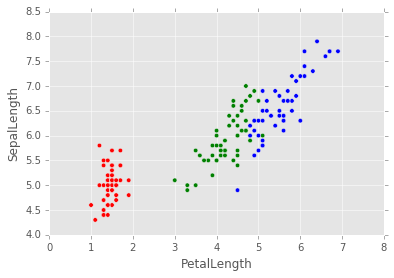

In [79]:
# Lengths
df.plot('PetalLength', 'SepalLength', kind = 'scatter', c = color )

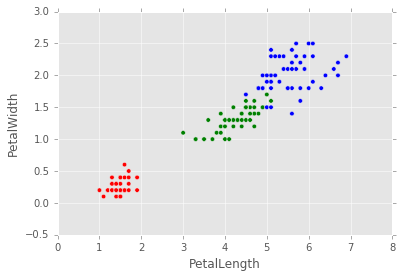

In [81]:
# Petals
df.plot('PetalLength', 'PetalWidth', kind = 'scatter', c = color )

The red (Satosa) is clustered off and easily separable.

## Part B - First hand-coded classifier

In [89]:
# Classify 
def my_first_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    else:
        return 'Versicolor'
    
# We group the remaining two in one, this classifier will be correct for 2/3 of the data.

In [90]:
y_hat = df.apply(my_first_classifier, axis = 1)

y_hat

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145    Versicolor
146    Versicolor
147    Versicolor
148    Versicolor
149    Versicolor
dtype: object

In [91]:
species_df = pd.DataFrame({'Observed': df.Species, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Versicolor
146,Virginica,Versicolor
147,Virginica,Versicolor
148,Virginica,Versicolor


## Part C - Classification metrics

### Accuracy

In [93]:
# How many did we predict correctly?
(species_df.Observed == species_df.Predicted).mean()

0.66666666666666663

### Misclassification rate

In [95]:
# How many did we predict incorrectly?
(species_df.Observed != species_df.Predicted).mean()

0.33333333333333331

## Part D - Activity | Second hand-coded classifier

In [98]:
def my_second_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    elif row.PetalLength < 5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [99]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [100]:
# Incorrect values
sum(y_hat != df.Species)

8

In [102]:
# Mean
1. * sum(y_hat == df.Species) / len(df)

0.9466666666666667

## Part E

### Feature matrix and label vector

In [103]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
y = df.Species

In [104]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### K-Nearest Neighbors (KNN)

In [106]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, 
                                       weights = 'uniform')
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
y_hat = model.predict(X)

In [108]:
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Virginica
146,Virginica,Virginica
147,Virginica,Virginica
148,Virginica,Virginica


In [109]:
species_df[species_df.Predicted != species_df.Observed]

,Observed,Predicted
70,Versicolor,Virginica
72,Versicolor,Virginica
83,Versicolor,Virginica
106,Virginica,Versicolor
119,Virginica,Versicolor


In [110]:
sum(species_df.Predicted != species_df.Observed)

5

You can measure the precision of your prediction either manually or with `.score()`

In [111]:
1. * sum(species_df.Predicted == species_df.Observed) / len(df)

0.9666666666666667

In [112]:
model.score(X, y)

0.96666666666666667

# weights = 'uniform'

In [113]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X, y).score(X, y)

0.96666666666666667

# weights = 'distance'

In [114]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

1.0

## Part F - What is the best value for `k`?

In [116]:
# Try all values of k and see which fits best
k = range(1, len(df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, y), axis = 1)

models

score_df['Score'] = models.map(lambda model: model.score(X, y))

In [118]:
score_df

,k,Score
0,1,1.000000
1,2,0.980000
2,3,0.960000
3,4,0.960000
4,5,0.966667
...,...,...
144,145,0.600000
145,146,0.580000
146,147,0.580000
147,148,0.560000


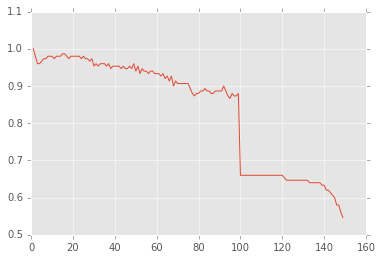

In [119]:
plt.plot(score_df.k, score_df.Score)

## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [ ]:
train_df = df.sample(frac = .6, random_state = 0).sort()

In [ ]:
train_df

In [ ]:
test_df = df.drop(train_df.index)

In [ ]:
test_df

The error in the training set is less than the error is the test set

In [ ]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
train_y = train_df.Species

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(train_X, train_y)
print 'train = ', model.score(train_X, train_y)

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
test_y = test_df.Species

print 'test  = ', model.score(test_X, test_y)

In [ ]:
k = range(1, len(train_df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

score_df['TrainScore'] = models.apply(lambda model: model.score(train_X, train_y))
score_df['TestScore'] = models.apply(lambda model: model.score(test_X, test_y))

In [ ]:
score_df

In [ ]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [ ]:
len(train_df)

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, len(train_df) * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = cross_validation.KFold(len(train_df), n_folds = k_cv)
)

gs.fit(train_X, train_y)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'Score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

In [ ]:
plt.plot(score_df.k, score_df.Score)

In [ ]:
score_df[score_df.Score == score_df.Score.max()]

In [ ]:
score_df[score_df.Score == score_df.Score.min()]

In [ ]:
gs.score(test_X, test_y)